# US Census API with Python

## Get API Key

 - Visit https://www.census.gov/data/developers.html
 - Click "Request API Key"
 - Enter en email address, it is fine to use your Temple University email
 - Confirmation will be sent to your email

## First Request

To request data from the U.S. Census Bureau API, you generally need four things:
 - API endpoint (based on the dataset you want)
 - Variables (what data you want)
 - Geography (where you want the data for)
 - API key (free from the Census website)

Example API Endpoint: 
https://api.census.gov/data/2020/dec/pl

Example Query 
https://api.census.gov/data/2020/dec/pl?get=NAME,P1_001N&for=state:*&key=YOUR_API_KEY
 - P1_001N = Total population
 - NAME = Name of the state
 - for=state:* = All states
 - key=YOUR_API_KEY = Your personal API key

Replace the sample query above with your API key. If you paste the query in the web-browser (Chrome or Firefox), the results will display in pretty-printed format.

## Census Datasets & Variables

### Decennial Census (2020, 2010, 2000)


1. PL — Redistricting Data (PL 94-171)
 - Path: `/2020/dec/pl`
 - Link: https://api.census.gov/data/2020/dec/pl/variables.html <-- Start here!
 - Purpose: Redistricting
 - Includes: Total population, race, Hispanic or Latino origin, voting age
 - Geographies: State down to census block

2. DHCP — Demographic and Housing Characteristics File
 - Path: `/2020/dec/dhcp`
 - Purpose: General demographic and housing stats
 - Includes: Sex, age, group quarters population, occupancy status
 - Release: Released after PL, more detailed
 - Geographies: State to census block

3. SF1 — Summary File 1 (for earlier censuses like 2010)
 - Path: `/2010/dec/sf1`
 - Includes: Detailed population and housing counts
 - Data: Age, sex, race, household relationships, housing characteristics
 - Geographies: State to block level

4. SF2 — Summary File 2 (for earlier censuses like 2010)
 - Path: `/2010/dec/sf2`
 - Purpose: Same as SF1 but cross-tabulated by race and ethnicity
 - Data: For population groups large enough in a given area

 The 2020 census had fewer detailed summary files due to the move toward data privacy protections (Differential Privacy), but DHCP replaces many of the older SF1-like functions.

### American Community Survey 5-Year Data (2009 - 2023)

Docs for variable names in 5 year data: https://api.census.gov/data/2023/acs/acs5/variables.html

#### Example Queries

Get voting-age population (18+) by census block in Los Angeles County, California from the 2020 Decennial Census using use the PL 94-171 data. You must filter by state and county, since block-level data cannot be queried nationwide due to size.

https://api.census.gov/data/2020/dec/pl?get=NAME,P3_001N&for=block:*&in=state:06+county:037&key=YOUR_API_KEY
 - `2020/dec/pl` = 2020 Decennial Census, PL 94-171 redistricting files
 - NAME = Block name
 - P3_001N = Voting-age population
 - state, county, tract, block = FIPS codes

Note: To get county names and FIPS codes in a specific state using the Census API, you can use the Geography endpoint from nearly any dataset (since geographic data is shared across many of them).

County Names & FIPS in California:
https://api.census.gov/data/2020/dec/pl?get=NAME&for=county:*&in=state:06

Get median household income for block groups in Pennsylvania using the 2023 ACS 5-Year Estimates from the U.S. Census API. Must filter by county — no wildcard for block group across the whole state at once.

https://api.census.gov/data/2023/acs/acs5?get=NAME,B19013_001E&for=block%20group:*&in=state:42%20county:101&key=YOUR_API_KEY

 - `2023/acs/acs5` = 2023 American Community Survey 5 year data 
 - state:42 = Pennsylvania
 - county:101 = Philadelphia County
 - block group:* = All block groups
 - B19013_001E = Median household income
 - NAME = Block group name

## Geographic Hierarchies and FIPs codes

FIPS codes are standardized numeric or alphanumeric codes used to uniquely identify geographic areas in the U.S. They’re assigned by the federal government and used in datasets like the Census for consistent reference.

![image info](images/US-Census-Spine_D3.jpg)

A full FIPS code is 15 digits. For example, a Census Block in Philadelphia:
 - Full code:    4210101230022023
 - State:        42  
 - County:       101  
 - Tract:        012300  
 - Block Group:  2  
 - Block:        2023  

The Decennial Census provides granularity to **blocks**. 
The Amercian Community Survey 5-year Data provides granularity to **block groups**.

## TIGER Geospatial Boundaries

TIGER/Line Files (Topologically Integrated Geographic Encoding and Referencing) are geospatial data files from the U.S. Census Bureau that contain the shapes and boundaries of geographic features used in Census data.

TIGER Home page: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

TIGER provides a web interface and FTP to browse and download boundaries. The FTP is useful for programatic processes and scripts because you can provide a direct url to your program.

FTP example: Census tracts by state: https://www2.census.gov/geo/tiger/TIGER2024/TRACT/

Download census tract boundaries for Pennsylvania https://www2.census.gov/geo/tiger/TIGER2024/TRACT/tl_2024_42_tract.zip
This will download zipped Shapefiles.

## Create a Data Pipeline with Python

We can use Python and Geopandas to download and merge Census demographic data with TIGER shapefile data

In [29]:
import geopandas as gpd
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [12]:
# -----------------------
# 1. Download TIGER Tract Shapefile for Philadelphia County (FIPS: 42-101)
# -----------------------
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_42_tract.zip"
response = requests.get(tiger_url)

with ZipFile(BytesIO(response.content)) as z:
    z.extractall("output")

gdf_tracts_pa = gpd.read_file("output/tl_2023_42_tract.shp")

In [ ]:
#filter to just include Philadelphia (County FIPS code 101)
gdf_tracts = gdf_tracts_pa[gdf_tracts_pa["COUNTYFP"] == "101"]
gdf_tracts.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
24,42,101,036501,42101036501,1400000US42101036501,365.01,Census Tract 365.01,G5020,S,1816210,7169,+40.1288937,-075.0122761,"POLYGON ((-75.02371 40.13005, -75.02301 40.130..."
25,42,101,000801,42101000801,1400000US42101000801,8.01,Census Tract 8.01,G5020,S,99957,12755,+39.9497374,-075.1804054,"POLYGON ((-75.18329 39.94951, -75.18166 39.951..."
141,42,101,026301,42101026301,1400000US42101026301,263.01,Census Tract 263.01,G5020,S,406340,0,+40.0728148,-075.1637161,"POLYGON ((-75.16899 40.07147, -75.16864 40.071..."
172,42,101,029200,42101029200,1400000US42101029200,292,Census Tract 292,G5020,S,1745920,28444,+40.0249035,-075.1017831,"POLYGON ((-75.11288 40.02746, -75.1128 40.0274..."
173,42,101,024400,42101024400,1400000US42101024400,244,Census Tract 244,G5020,S,421189,0,+40.0248284,-075.1638925,"POLYGON ((-75.16912 40.02386, -75.16843 40.024..."


In [ ]:
# -----------------------
# 2. Get ACS 2023 Median Home Value for Each Tract in Philadelphia
# -----------------------
api_key = "YOUR_API_KEY"  # Replace with your API key

acs_url = (
    "https://api.census.gov/data/2023/acs/acs5"
    "?get=B25077_001E&for=tract:*&in=state:42&in=county:101"
    f"&key={api_key}"
)

print(acs_url)

response = requests.get(acs_url, timeout=5)
data = response.json()



https://api.census.gov/data/2023/acs/acs5?get=B25077_001E&for=tract:*&in=state:42&in=county:101&key=589a5c19491698e6417c54fecc498cb43bd455cc
200
[['B25077_001E', 'state', 'county', 'tract'], ['518100', '42', '101', '000101'], ['522800', '42', '101', '000102'], ['543300', '42', '101', '000200'], ['588300', '42', '101', '000300'], ['524600', '42', '101', '000401'], ['937100', '42', '101', '000403'], ['351300', '42', '101', '000404'], ['441800', '42', '101', '000500'], ['-666666666', '42', '101', '000600'], ['529300', '42', '101', '000701'], ['206600', '42', '101', '000702'], ['732500', '42', '101', '000801'], ['638300', '42', '101', '000803'], ['398500', '42', '101', '000805'], ['345000', '42', '101', '000806'], ['350000', '42', '101', '000901'], ['711700', '42', '101', '000902'], ['502900', '42', '101', '001001'], ['538200', '42', '101', '001002'], ['584900', '42', '101', '001101'], ['771100', '42', '101', '001102'], ['868100', '42', '101', '001201'], ['-666666666', '42', '101', '001203

In [31]:
# Convert to DataFrame
columns = data[0]
rows = data[1:]
df_acs = pd.DataFrame(rows, columns=columns)

# Create GEOID to match shapefile
df_acs["GEOID"] = df_acs["state"] + df_acs["county"] + df_acs["tract"]
df_acs["B25077_001E"] = pd.to_numeric(df_acs["B25077_001E"], errors="coerce")  # Median value

# Remove null records "B25077_001E" = -666666666
df_acs_clean = df_acs[df_acs["B25077_001E"] > 0]


In [32]:
# -----------------------
# 3. Merge TIGER shapes with ACS data
# -----------------------
gdf_merged = gdf_tracts.merge(df_acs_clean[["GEOID", "B25077_001E"]], on="GEOID")


In [33]:
# -----------------------
# 4. Done! Inspect or save
# -----------------------
print(gdf_merged.head())
# gdf_merged.to_file("philly_median_home_value.geojson", driver="GeoJSON")

  STATEFP COUNTYFP TRACTCE        GEOID               GEOIDFQ    NAME  \
0      42      101  036501  42101036501  1400000US42101036501  365.01   
1      42      101  000801  42101000801  1400000US42101000801    8.01   
2      42      101  026301  42101026301  1400000US42101026301  263.01   
3      42      101  029200  42101029200  1400000US42101029200     292   
4      42      101  024400  42101024400  1400000US42101024400     244   

              NAMELSAD  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
0  Census Tract 365.01  G5020        S  1816210    7169  +40.1288937   
1    Census Tract 8.01  G5020        S    99957   12755  +39.9497374   
2  Census Tract 263.01  G5020        S   406340       0  +40.0728148   
3     Census Tract 292  G5020        S  1745920   28444  +40.0249035   
4     Census Tract 244  G5020        S   421189       0  +40.0248284   

       INTPTLON                                           geometry  \
0  -075.0122761  POLYGON ((-75.02371 40.13005, -75.02301 4

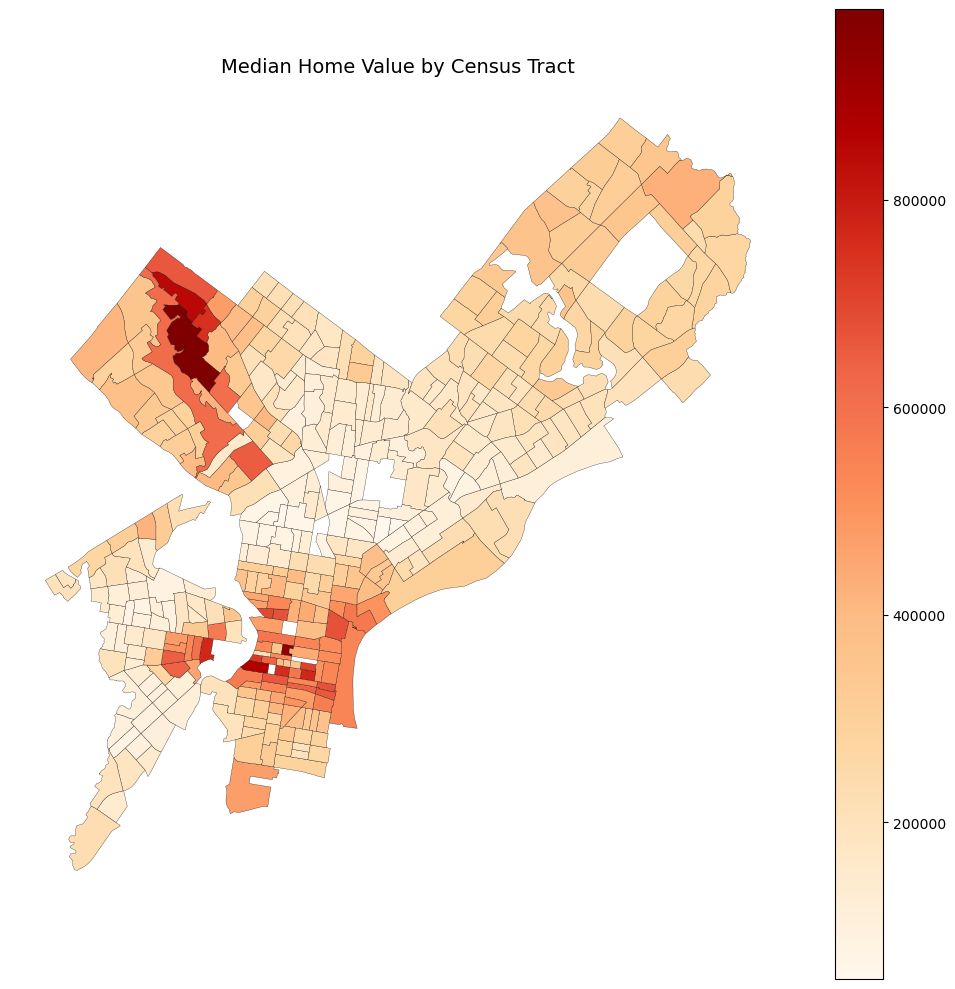

In [34]:

# Plot the choropleth
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(
    column="B25077_001E",     # Column to shade by
    cmap="OrRd",              # Color map (others: 'Viridis', 'Blues', etc.)
    linewidth=0.2, 
    edgecolor="black", 
    legend=True, 
    ax=ax
)

# Add title and tidy up
ax.set_title("Median Home Value by Census Tract", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()